<a href="https://colab.research.google.com/github/KLeeDE/Machine-Learning/blob/master/NYC_Stop_and_Frisk_predictors_of_arrests_and_summons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLPP20 // Assignment #5 **(GGD: Total = 56 / 65)**

assigned : **Apr 23, 2020**

DUE : **Apr 30, 2020 11:59pm**

## NYC Stop and Frisk: predictors of arrests and summons

<img src="https://i1.wp.com/www.nationalreview.com/wp-content/uploads/2018/01/new-york-city-stop-and-frisk-crime-decline-conservatives-wrong-1.jpg?fit=789%2C460&ssl=1" width=500x>

---

The data used for this assignment were pulled from [here](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page).


<u>**Instructions for tasks that will be graded are in bold below.**</u>

### Part 1 - Background **(GGD: +10)**

**<u>In your own words</u>, provide a brief (no more than 500 words) descriptive overview of the NYC Stop and Frisk program.**

In 2013, the former NYC Mayor candidate Bill de Blasio ran a campaign ad "end a stop-and-frisk era that unfairly targets poor people of color" ([Stolper & Johnes, 2018](https://www.cssny.org/news/entry/stop-and-frisk)). NYC Stop and Frisk is a stop-question-and-fristk pram run by New York City Police Department (NYPD) ([Wikipedia, 2020](https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City)). According to the NYPD official website, NYCLU revealed that people have been subjected to police stops and street interrogations more than 5 million times since 2002 and that Black and Latinx communities continue to be the overwhelming target ([NYCLU, 2020](https://www.nyclu.org/en/stop-and-frisk-data)). The NYUPD uploads dataset and codebook which contains over 100 variables and 12,404 observations, each of which represents a stop conducted by an NYPD officer. Around 76% of people subjected to a recorded stop were innocent (neither arrested nor issued a summons) in 2016 ([Stolper & Johnes, 2018](https://www.cssny.org/news/entry/stop-and-frisk)). Among the stops reported by the NYPD in 2019, 35% resulted in an arrest or summons for the potential sign of improvement in police officers' use of tactic ([Yasmeen, 2020](https://gothamist.com/news/nyc-ending-illegal-stop-and-frisk-era)). In November 2019, the former NYC Mayor Michael Bloomberg apologized publicly for the use of tactic intended to reduce violent crime that had for years been criticized as racially biased ([Fradella & White, 2019](https://theconversation.com/stop-and-frisk-can-work-under-careful-supervision-127785)). Therefore, it is important to know how the NYC Stop and Frisk program data is shown and find implications.       

**Reference**:

Fradella, H. & White, M. (Dec, 2019). 'Stop-and-frisk' can work, under careful supervision.

NYCLU (Apr, 2020). Stop-And-Frisk Data. 

Stolper, H. & Jones, J. (Apr, 2018). The Enduring Discriminatory Practice of Stop & Frisk. 

Yasmeen Khan (Feb, 2020). NYC Has "A Long Way To Go" To End The Illegal Stop-And-Frisk Era. 

Wikipedia (Apr, 2020).Stop-and=frisk in New York City.



### Part 2 - Loading and Cleaning data **(GGD: +15)**

**Read in the 2010 stop and frisk data from  `mlpp20/data/stop_and_frisk/` into a DataFrame called `sqf` setting `low_memory=False` in `pd.read_csv`.**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

fname = "/content/drive/My Drive/mlpp20/data/stop_and_frisk/2010.csv"
sqf = pd.read_csv(fname, low_memory=False)
sqf.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,...,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2010,78,81,1012010,340,1,O,P,1,MISD,13,V,Y,N,N,,Y,240.20,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,...,N,N,79,79,Y,N,,,M,B,5071992,17,5,10,180,BK,BR,M,,L,,,SIDEWALK,,,QUINCY ST,CLASSON AV,,BROOKLYN,,,78,,,,995504,189189,CM,1,20
1,2010,26,21,1042010,1548,1,O,P,2,ROBBERY,5,P,Y,N,N,,Y,POSS OF,0,0,N,I,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,862,862,Y,N,,S,M,P,5241989,20,5,6,160,BK,BR,M,,L,,,SOUTHBOUND C TRAIN,,,SAINT NICHOLAS AVENUE,WEST 135 STREET,,MANHATTAN,,,26,F,,,998641,236979,CM,1,85
2,2010,18,34,1092010,1550,1,I,T,1,MISD,6,P,Y,N,N,,N,,0,0,Y,,Y,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,...,N,N,872,872,N,N,,,M,Q,9201955,55,5,5,145,SP,BR,M,,L,,,N/B A PLATFORM,,,COLUMBUS CIRCLE,WEST 58 STREET,,MANHATTAN,,,18,H,,,,,CM,1,20
3,2010,108,102,1112010,1120,A,O,P,5,BURGLARY,10,P,Y,Y,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,184,184,Y,N,V,S,M,Q,5021992,17,5,9,165,BR,BR,M,,L,,,STREET,,,55 STREET,QUEENS BOULEVARD,,QUEENS,,,108,G,,,1009146,209683,CM,1,14
4,2010,23,2437,1222010,1620,1,O,H,1,CPM,5,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,...,N,N,23,23,N,N,,,M,B,8281954,55,6,1,250,BK,BR,H,,L,,,STREET,1370,5 TH AVENUE,,,,MANHATTAN,,,23,,,,,,CM,1,27


<b> Drop all columns (see the data dictionary at the website above) except: (GGD: -2 [whether the subject was frisked is FRISKED not OTHPERS and suspected of carrying a weapong is RF_OTHSW])
- whether an arrest was made = "ARSTMADE"
- whether a summons was issued = "SUMISSUE"
- the period of observation = "PEROBS"
- whether the subject was frisked = "OTHPERS" - stopped, questioned, or frisked
- whether the subject was suspected of carrying a weapon (rf_othsw)  = "ASLTWEAP"
- the subject's sex = "sex"
- the subject's age = "age"
- the subject's race = "race"
- the x coordinate of the stop = "xcoord"
- the y coordinate of the stop ="ycoord"
</b>

In [0]:
sqf = sqf[["arstmade", "sumissue", "perobs", "othpers", "asltweap", "sex", "age", "race", "xcoord", "ycoord"]]

**Convert `xcoord`, `ycoord`, and `age` to numeric values using the `pd.to_numeric()` function setting `errors="coerce"` <small>(see the [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html))</small>.**

In [0]:
sqf["xcoord"] = pd.to_numeric(sqf["xcoord"], errors="coerce")
sqf["ycoord"] = pd.to_numeric(sqf["ycoord"], errors="coerce")
sqf["age"] = pd.to_numeric(sqf["age"], errors="coerce")

**Convert all columns with "Y/N" values to 1/0 values (1="Yes", 0="No").**

In [0]:
sqf.replace(("yes", "no"), (1,0), inplace=True)
sqf.replace(("Y", "N"), (1,0), inplace=True)

**Drop all rows with NaNs.**

In [0]:
sqf = sqf.dropna()

**Create a column called `court` signifying whether the individual was required to appear in court or not (i.e., an arrest was made or a summons was issued)**

In [0]:
sqf["court"] = 2

**Drop the `arstmade` and `sumissue` columns.**

In [0]:
sqf = sqf.drop(["arstmade", "sumissue"], axis=1)
sqf.head()

,perobs,othpers,asltweap,sex,age,race,xcoord,ycoord,court
0,1,0,0,M,17,B,995504.0,189189.0,1
1,2,0,0,M,20,P,998641.0,236979.0,1
3,5,1,0,M,17,Q,1009146.0,209683.0,0
5,5,0,0,M,57,Q,997374.0,234664.0,1
7,2,0,0,F,35,B,999539.0,239499.0,0


### Part 3 - Fitting a Decision Tree Classifier **(GGD: +20)**

**`court` will be your target variable.  Create a balanced data set.**

In [0]:
# -- pull out the target variable
court = 1 * (sqf["court"] == "A")

# Check balance
ntrue = (sqf["court"] == True).sum()
nfalse = (sqf["court"] == False).sum()
print("Number of True  (sqf) : {0:5}".format(ntrue))
print("Number of Flase (sqf) : {0:5}".format(nfalse))
print("The target variable Court is imbalanced")

# Create a random training and testing set 
true = sqf[sqf["court"] == True]
false = sqf[sqf["court"] == False]

false_sample = false.sample(n=len(true), random_state=314)

balance = pd.concat([true, false_sample])
balance.head()
print("")

# Check whether the dataset is balanced
ntrue = (balance["court"] == True).sum()
nfalse = (balance["court"] == False).sum()
print("Number of True  (balance) : {0:5}".format(ntrue))
print("Number of Flase (balance) : {0:5}".format(nfalse))
print("The target variable Court is balanced")

Number of True  (sqf) : 77726
Number of Flase (sqf) : 498123
The target variable Court is imbalanced

Number of True  (balance) : 77726
Number of Flase (balance) : 77726
The target variable Court is balanced


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


**Extract the features and target arrays.**

In [0]:
targ = balance["court"].copy()
feat = balance.drop(columns="court").copy()

**One hot encode the features.**

In [0]:
feat = pd.get_dummies(feat)

**Create a training/testing set with an 80/20 split.**

In [0]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.2)

**Fit a Decision Tree Classifier to the training data using the default hyperparameters.**

In [0]:
dtc = DecisionTreeClassifier()

# -- fit a decision tree classifier on the TRAINING data
dtc.fit(feat_tr, targ_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

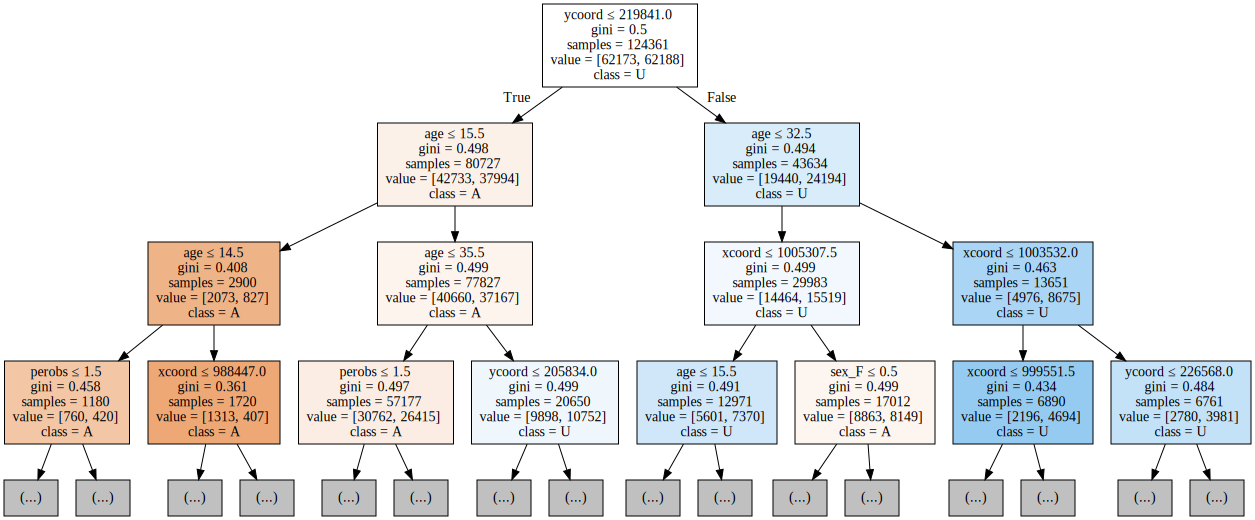

In [0]:
# -- visualize the tree (Additional)
dt_data = tree.export_graphviz(dtc, out_file=None, 
                      filled=True, rounded=False,  
                      special_characters=True, max_depth=3, feature_names=feat.columns, class_names=["A", "U"])  
graph = graphviz.Source(dt_data)
graph

**Print the training and testing accuracy.**

In [0]:
# -- assess the accuracy on the TRAINING data
pred_tr = dtc.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("Training accuracy = {0:.3f}".format(acc_tr))

# -- assess the accuracy on the TESTING data
pred_te = dtc.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("Testing accuracy = {0:.3f}".format(acc_te))

Training accuracy = 0.990
Testing accuracy = 0.575


### Part 4 - Tuning Hyperparameters and Applying a Random Forest model **(GGD: +11)**

**Use grid search with cross validation to tune hyperparameters in the Decision Tree Classifier so that you minimize overfitting while maximizing testing accuracy.**

In [0]:
# -- import helper tools from sklearn
from sklearn.model_selection import GridSearchCV

# -- select the parameter(s) to tune and the values to try
tuned_parameters = [{"min_samples_leaf" : [1, 2, 5, 10, 20, 50, 100, 200, 1000]}]

# -- perform Grid Search
dtc_tune = DecisionTreeClassifier()
cv_tune = GridSearchCV(dtc_tune, tuned_parameters)
cv_tune.fit(feat_tr, targ_tr)

# -- print out the params with the highest "score"
print(cv_tune.best_params_)

{'min_samples_leaf': 50}


**What are the training and testing accuracy using the best fit hyperparameters from grid search?**

In [0]:
# -- define classifier
dtc_mod = DecisionTreeClassifier(min_samples_leaf=50)

# -- fit a decision tree classifier on the TRAINING data
dtc_mod.fit(feat_tr, targ_tr)

# -- assess the accuracy on the TRAINING data
pred_tr = dtc_mod.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("Training accuracy = {0:.3f}".format(acc_tr))

# -- assess the accuracy on the TESTING data
pred_te = dtc_mod.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("Testing accuracy = {0:.3f}".format(acc_te))

Training accuracy = 0.646
Testing accuracy = 0.579


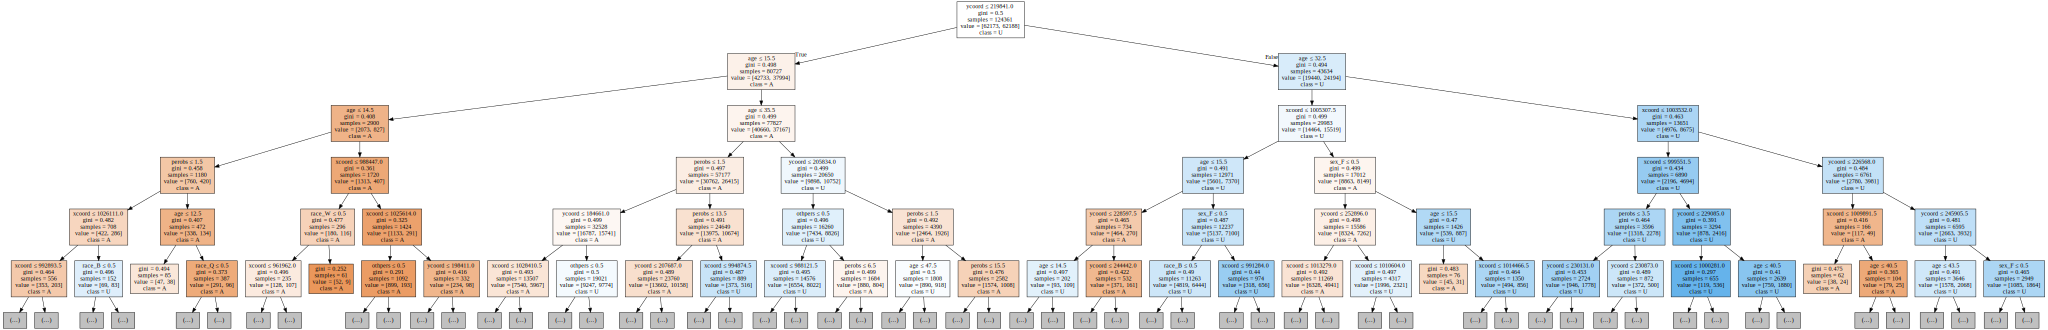

In [0]:
# -- visualize the tree (Additional)
dt_data = tree.export_graphviz(dtc_mod, out_file=None, 
                      filled=True, rounded=False,  
                      special_characters=True, max_depth=5, feature_names=feat.columns, class_names=["A", "U"])  
graph = graphviz.Source(dt_data)
graph

**Keeping those same hyperparameters, what is the training/testing accuracy for a Random Forest Classifer with `n_estimators=100`?  `n_estimators=1000`?**

In [0]:
# -- instantiate a Random Forest Classifier
rfc = RandomForestClassifier()

# -- fit to the TRAINING data
rfc.fit(feat_tr, targ_tr)

# -- predict the TRAINING and TESTING data
pred_tr = rfc.predict(feat_tr)
pred_te = rfc.predict(feat_te)
acc_tr  = accuracy_score(targ_tr, pred_tr)
acc_te  = accuracy_score(targ_te, pred_te)

# -- instantiate a Random Forest Classifier (n_estimators=100)
rfc = RandomForestClassifier(max_features=5, min_samples_leaf=50, n_estimators=100)

# -- fit to the TRAINING data
rfc.fit(feat_tr, targ_tr)

# -- predict the TRAINING and TESTING data
pred_tr = rfc.predict(feat_tr)
pred_te = rfc.predict(feat_te)
acc_tr  = accuracy_score(targ_tr, pred_tr)
acc_te  = accuracy_score(targ_te, pred_te)

print("Training accuracy (Number of estimator = 100): {0:.4f}".format(acc_tr))
print("Testing accuracy  (Number of estimator = 100): {0:.4f}".format(acc_te))

# -- instantiate a Random Forest Classifier (n_estimators=1000)
rfc2 = RandomForestClassifier(max_features=5, min_samples_leaf=50, n_estimators=1000)

# -- fit to the TRAINING data
rfc2.fit(feat_tr, targ_tr)

# -- predict the TRAINING and TESTING data
pred_tr = rfc2.predict(feat_tr)
pred_te = rfc2.predict(feat_te)
acc_tr  = accuracy_score(targ_tr, pred_tr)
acc_te  = accuracy_score(targ_te, pred_te)

print("")
print("Training accuracy (Number of estimator = 1000): {0:.4f}".format(acc_tr))
print("Testing accuracy  (Number of estimator = 1000): {0:.4f}".format(acc_te))


Training accuracy (when number of estimator is 100): 0.6322
Testing accuracy  (when number of estimator is 100): 0.5979

Training accuracy (when number of estimator is 1000): 0.6330
Testing accuracy  (when number of estimator is 1000): 0.5958


**Comment on the relative feature importances for the Random Forest Classifier you fit above.**

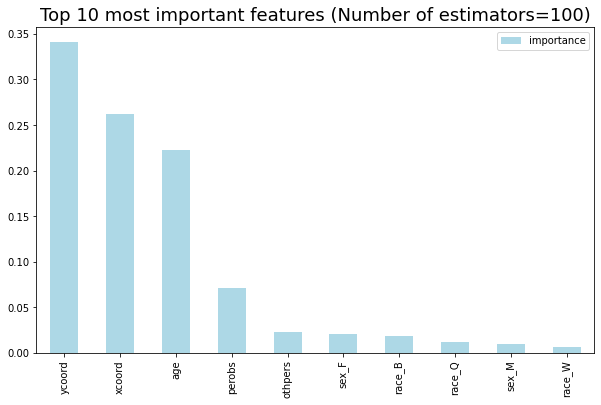

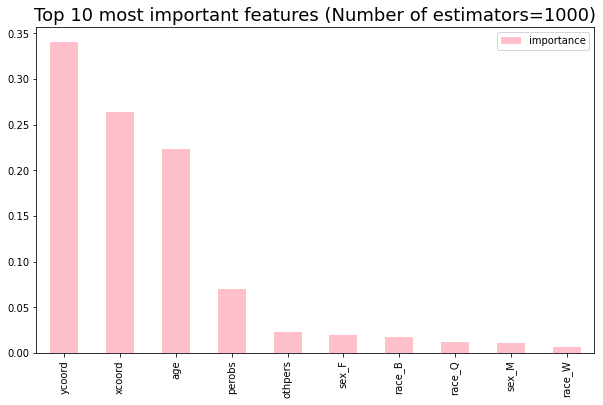

In [0]:
# -- Case1: When number of estimator is 100
imp = pd.DataFrame()
imp["name"] = feat_tr.columns
imp["importance"] = rfc.feature_importances_
# -- display all rows
pd.set_option("display.max_rows", 500)
# -- sort by importance
imp = imp.sort_values("importance", ascending=False)
# -- make a bar chart of top 10 most important features
ax = imp[:10].plot("name", "importance", kind="bar", figsize=[10, 6], color="lightblue")
dum = ax.set_xlabel("")
dum = ax.set_title("Top 10 most important features (Number of estimators=100)", fontsize=18)

# -- Case2: When number of estimator is 1000
imp2 = pd.DataFrame()
imp2["name"] = feat_tr.columns
imp2["importance"] = rfc2.feature_importances_
# -- display all rows
pd.set_option("display.max_rows", 500)
# -- sort by importance
imp2 = imp2.sort_values("importance", ascending=False)
# -- make a bar chart of top 10 most important features
ax = imp2[:10].plot("name", "importance", kind="bar", figsize=[10, 6], color="pink")
dum = ax.set_xlabel("")
dum = ax.set_title("Top 10 most important features (Number of estimators=1000)", fontsize=18)

**Comment**: 

Summary of accuracy results 

*   Decision Tree Training Accuracy (Number of estimator=100) : 0.646
*   Decision Tree Testing  Accuracy (Number of estimator=100) : 0.579


*   Random Forest Training Accuracy  (Number of estimator=100): 0.6322
*   Random Forest Testing  Accuracy  (Number of estimator=100): 0.5979


*   Random Forest Training Accuracy (Number of estimator=1000): 0.6330
*   Random Forest Testing  Accuracy (Number of estimator=1000): 0.5958

According to the result, tree implications can be found in this study as followings: 
1.   training accuracy is higher than testing accuracy in both decision tree model and random forest model;
2.   accuracy of random forest model is higher than decision tree model (since a random forest is simply a collection of decision trees);
3.   accuracy is increased when number of estimator is increased. 

